<a href="https://colab.research.google.com/github/fajni/ELFAK-TiMAP/blob/main/Linearna%20regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearna regresija

Predvidjanje CO2 Emisije na osnovu potrosnje goriva na autoputu.

Zavisnost CO2 Emisije (CO2EMISSIONS) u odnosu na potrosnju goriva na autoputu (FUELCONSUMPTION_HWY).

## Importovanje podataka

Link: https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Fuel/fuel_consumption.csv

In [143]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [144]:
try:
  !wget https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Fuel/fuel_consumption.csv -O fuel_consumption.csv
except:
  print("An exception occurred")

data = pd.read_csv("fuel_consumption.csv")
#data = pd.read_csv("fuel_consumption.csv").head(300)

data

--2025-06-27 14:10:03--  https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Fuel/fuel_consumption.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72616 (71K) [text/plain]
Saving to: ‘fuel_consumption.csv’

fuel_consumption.cs 100%[===================>]  70.91K  --.-KB/s    in 0.01s   

2025-06-27 14:10:03 (5.84 MB/s) - ‘fuel_consumption.csv’ saved [72616/72616]



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,NaN,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


---

## Prikaz dijagrama

Na dijagramu se prikazuje zavisnost CO2 Emisije u odnosu na potrosnju goriva na autoputu.

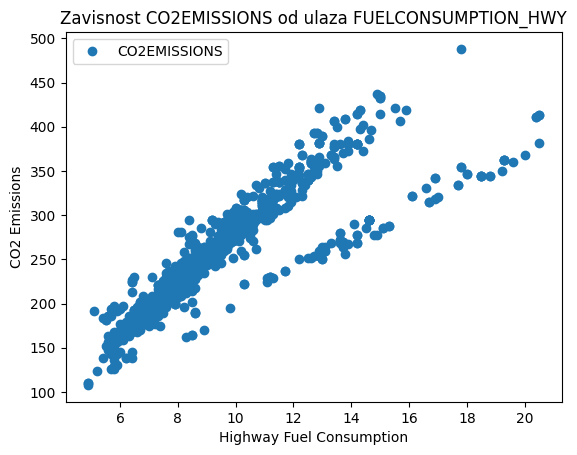

In [145]:
data.plot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', style='o')

plt.xlabel('Highway Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.title('Zavisnost CO2EMISSIONS od ulaza FUELCONSUMPTION_HWY')
plt.show()

Iz skupa podataka se izdvaja 1 nezavisna promenljiva X (_FUELCONSUMPTION_HWY_) i druga promenljiva ciju vrednost procenjujemo Y (_CO2EMISSIONS_).

- X osa - nezavisna promenljiva (ulaz),
- Y osa - zavisna promenljiva (izlaz/rezultat)



---



U _reshape()_ metodi, prvi argument je broj vrsta (-1 znaci da se broj vrsta/redova preuzima iz originalnog niza), a drugi argument je broj kolona:

In [146]:
X = data['FUELCONSUMPTION_HWY'].values.reshape(-1, 1)
Y = data['CO2EMISSIONS'].values.reshape(-1, 1)

---

## Treniranje/Testiranje

Atribut i labela se dele na deo za treniranje i deo za testiranje (_u odnosu 80:20_).

- Atribut (ulaz u model - informacije na osnovu kojih model uci),
- Labela (izlaz iz modela - ono sto zelimo da model predvidi)

Podaci se u train i test skupove ubacuju na slucajan nacin. Parametar _random_state_ je seed za taj slucajni izbor da bi izbor za svako izvrsenje programa bio isti.

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

---

## Obucavanje modela

Kreiranje modela linearne regresije:

In [148]:
model = LinearRegression()

# Treniranje modela
model.fit(X_train, Y_train)

LinearRegression()



---



Opsta forma linearne regresije: _y = a*x + b_

- x - ulazna promenljiva (_FUELCONSUMPTION_HWY_),
- y - predvidjena vrednost/izlazna promenljiva (_CO2EMISSIONS_),
- a - nagib prave,
- b - slobodni clan

In [149]:
print('Slobodni clan: ', model.intercept_)
print('Nagib prave: ', model.coef_)

Slobodni clan:  [66.01149145]
Nagib prave:  [[20.13824595]]


Predvidjanje vrednosti regresionim modelom:

In [150]:
Y_pred = model.predict(X_test)

---

## Rezultat

### Poredjenje stvarnih i predvidjenih vrednosti

In [151]:
df = pd.DataFrame({'Stvarno ': Y_test.flatten(), 'Predvidjeno ': Y_pred.flatten()})

print(df.head(15))

    Stvarno   Predvidjeno 
0        198    202.951564
1        361    323.781040
2        189    196.910090
3        380    351.974584
4        184    202.951564
5        191    206.979213
6        262    251.283354
7        207    217.048336
8        290    265.380126
9        292    263.366302
10       192    168.716546
11       181    176.771844
12       317    289.546021
13       177    204.965388
14       285    271.421600


Prikaz stvarnih i predvidjenih vrednosti

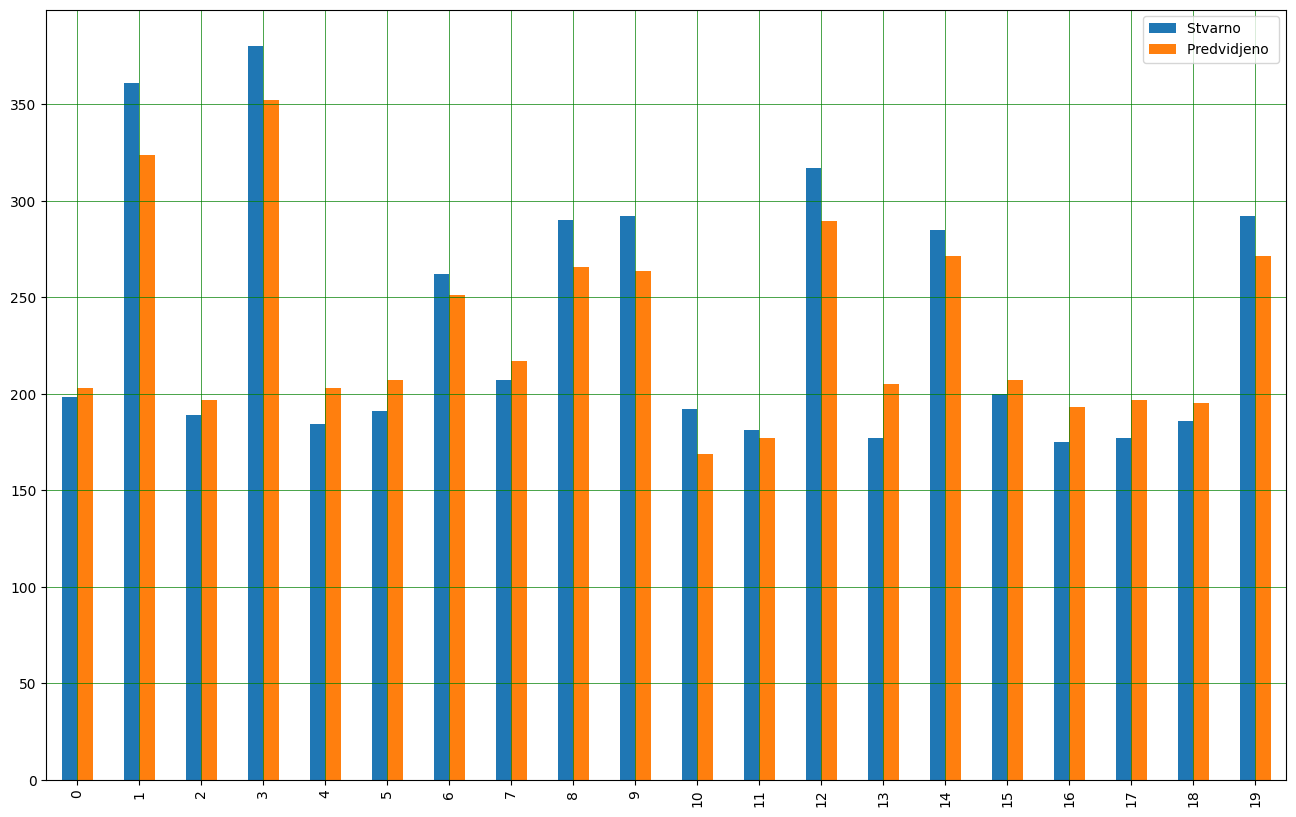

In [152]:
sp_df = df.head(20)

sp_df.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

---

Odredjivanje kvaliteta procene:

In [153]:
print('Srednja apsolutna greška:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Koeficijent determinacije:', model.score(X_test, Y_test))

Srednja apsolutna greška: 24.28111034753473
Koeficijent determinacije: 0.6840822467771728


Srednja apsolutna greska pokazuje neko odstupanje od stvarne vrednosti. (Pogledaj _Prikaz stvarnih i predvidjenih vrednosti_)

Koeficijent determinacije pokazuje koliko "dobro" linija regresije odgovara stvarnim podacima. Meri se "prilagodjenost" modela, ne njegova tacnost.

- Koeficijent determinacije: 0.68 - Model objasnjava 68% ukupne varijacije emisije CO2. Preostalih 32% su "greske" koje model ne moze da objasni.

---

### Vizuelni prikaz linearne regresije

Prikaz svih stvarnih vrednosti (dijagram rasipanja) i regresione prave:

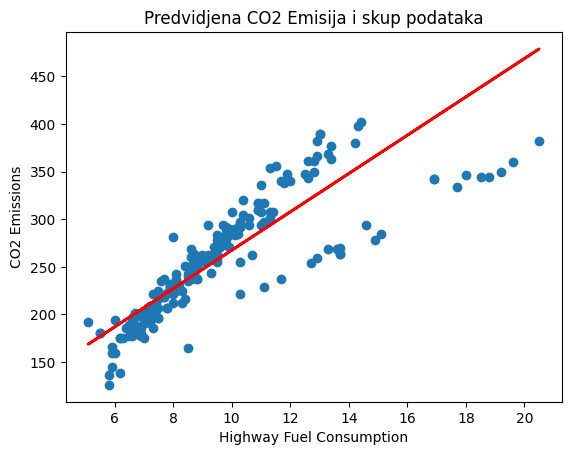

In [154]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.title('Predvidjena CO2 Emisija i skup podataka')
plt.xlabel('Highway Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()



---



Zavisnost CO2EMISSION od ulaza MAKE

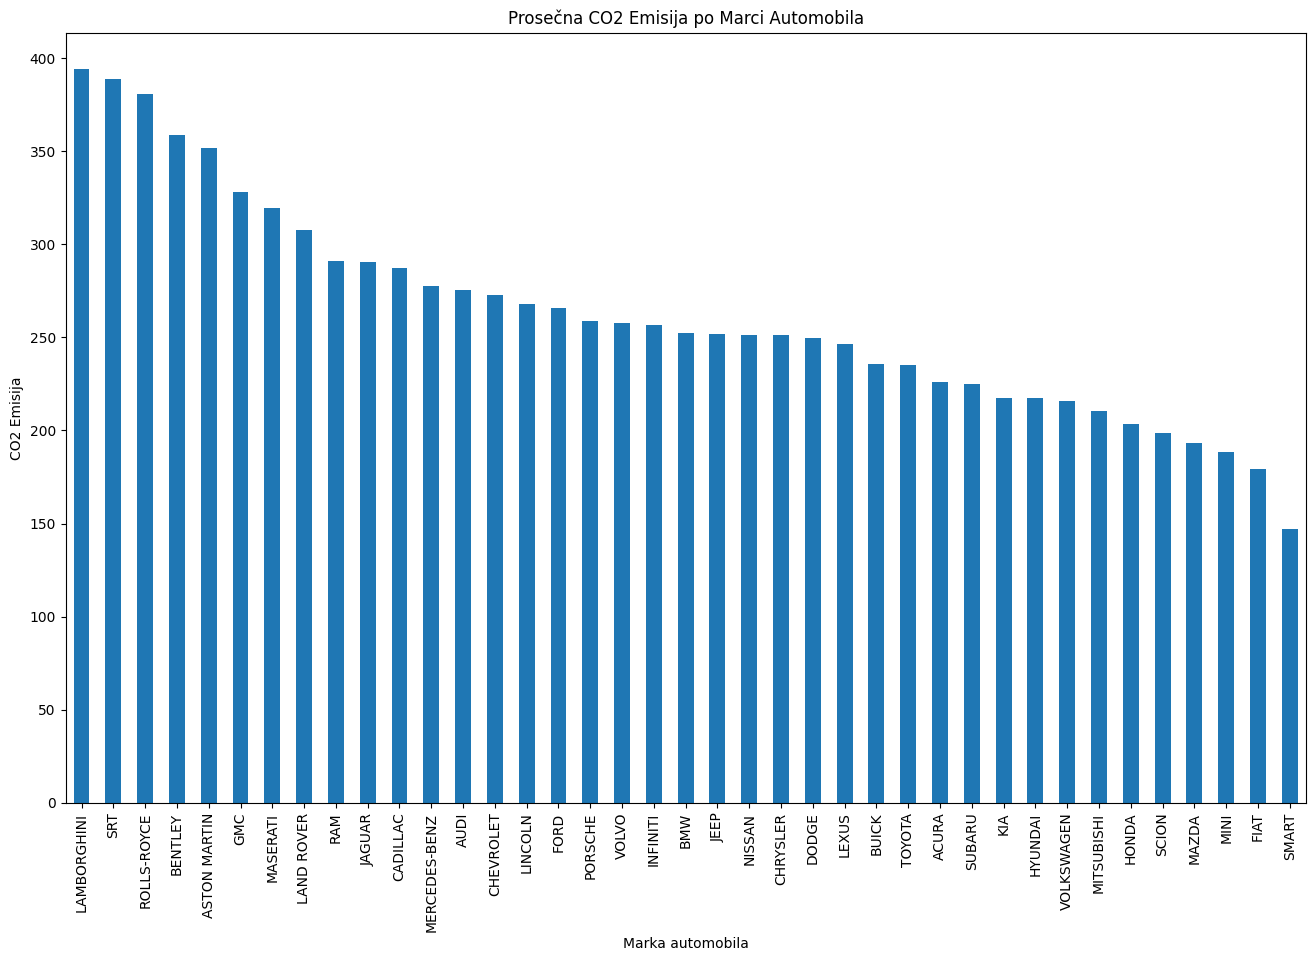

In [155]:
data = pd.read_csv("fuel_consumption.csv")

srednje_emisije = data.groupby('MAKE')['CO2EMISSIONS'].mean().sort_values(ascending=False)

srednje_emisije.plot(kind='bar', figsize=(16,10))

plt.title('Prosečna CO2 Emisija po Marci Automobila')
plt.xlabel('Marka automobila')
plt.ylabel('CO2 Emisija')
plt.show()